<a href="https://colab.research.google.com/github/GarrettTChrisman/MA489_AY23-2/blob/main/Main_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cloud authentication.
from google.colab import auth
auth.authenticate_user()

In [2]:
# Import, authenticate and initialize the Earth Engine library.
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=6GdwEjovAg1T-0RfiJtblVe4S-sK1UGCb22jEKsIwGk&tc=OSTNPz59twLS80r8Y1sQ0AFbu4YI1Ig1f4qZ_Qg-Ghk&cc=Mi8N0leUayrtJE8w-OVJZIdwi86NBvRwwCotfKBx_HQ

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AVHEtk4r97X1s2r3CYQc-aepR4AcUdTzASV1MY_KZYYZ5O9HR1adKnUf7Aw

Successfully saved authorization token.


In [3]:
# Folium setup.
import folium
print(folium.__version__)

0.14.0


Section 1: Import Libraries and Define Parameters

In [4]:
# Specify names locations for outputs in Cloud Storage. 
#FOLDER = 'fcnn-demo'
#TRAINING_BASE = 'training_patches'
#EVAL_BASE = 'eval_patches'

# Specify inputs (Sentinel 1 and 2 bands) to the model and the response variable.
sentinel1Bands = ['VH']
sentinel2Bands = ['B2', 'B3', 'B4']
BANDS = sentinel1Bands + sentinel2Bands
RESPONSE = 'classification'
FEATURES = BANDS + [RESPONSE]

# Specify the size and shape of patches expected by the model.
KERNEL_SIZE = 256
KERNEL_SHAPE = [KERNEL_SIZE, KERNEL_SIZE]
#COLUMNS = [
#  tf.io.FixedLenFeature(shape=KERNEL_SHAPE, dtype=tf.float32) for k in FEATURES
#]
#FEATURES_DICT = dict(zip(FEATURES, COLUMNS))

# Sizes of the training and evaluation datasets.
#TRAIN_SIZE = 16000
#EVAL_SIZE = 8000

# Specify model training parameters.
#BATCH_SIZE = 16
#EPOCHS = 10
#BUFFER_SIZE = 2000
#OPTIMIZER = 'SGD'
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [5]:
import ee
import folium
from IPython.display import HTML

# Initialize the Earth Engine API
ee.Initialize()

# Define the study area
geometryEASTTROUBLESOME = ee.Geometry.Polygon(
        [[[-106.35995808802429, 40.09143624618937],
          [-106.21850911341491, 40.023113520094526],
          [-105.81338826380554, 40.06516638148247],
          [-105.56207600794616, 40.23731181025701],
          [-105.57855550013366, 40.405883599932544],
          [-106.14023152552429, 40.39019593755868],
          [-106.36270467005554, 40.27189808516265]
        ]])

geometryPINEGULCH = ee.Geometry.Polygon(
        [[[-108.80164742558028, 39.28402267340665],
          [-108.23722481815841, 39.29358857295844],
          [-108.23997140018966, 39.56831366828538],
          [-108.79752755253341, 39.553491364366145]
          ]])


geometryMIDDLEFORK = ee.Geometry.Polygon(
        [[[-106.512402002753, 40.753196918644164],
          [-106.8467983650577, 40.75371707019316],
          [-106.8474850105655, 40.55002765883959],
          [-106.5007290291202, 40.54481005789992],
          [-106.5172085213077, 40.73602963469819]
          ]])

geometryGRIZZLYCREEK = ee.Geometry.Polygon(
        [[[-107.40066503796388, 39.69746161256133],
          [-107.39860510144044, 39.46619798632684],
          [-106.90834020886231, 39.46778823854969],
          [-106.96670507702638, 39.74763415825682],
          [-107.40272497448731, 39.73337830588799]
          ]])

geometryCOWCREEK = ee.Geometry.Polygon(
        [[[-107.67201512780343, 38.07020015659054],
          [-107.38225072350656, 38.06749727823019],
          [-107.39049046960031, 38.26023166606401],
          [-107.680941519405, 38.25430068136088]
          ]])

geometrySPRINGCREEK = ee.Geometry.Polygon(
        [[[-105.34492099139318, 37.35379518510812],
          [-105.02082431170568, 37.351611883859434],
          [-105.0276907667838, 37.720773594857334],
          [-105.34354770037756, 37.71751469634035]]])

geometryCHERRYCANYON = ee.Geometry.Polygon(
        [[[-103.53011965523325, 37.51499254964799],
          [-103.53011965523325, 37.336135915833296],
          [-103.33785891304575, 37.33176822282621],
          [-103.33785891304575, 37.519349567331446]]]);

geometries = [geometryEASTTROUBLESOME, geometryPINEGULCH, geometryMIDDLEFORK, geometryGRIZZLYCREEK, geometryCOWCREEK, geometrySPRINGCREEK, geometryCHERRYCANYON]

# Set the start and end dates for the pre-fire and post-fire image collections
prefire_start = '2020-05-20'
prefire_end = '2020-06-18'
postfire_start = '2020-09-20'
postfire_end = '2020-10-28'

#eastTrouble Dates
prefire_start_EASTTROUBLESOME = '2020-08-10' 
prefire_end_EASTTROUBLESOME = '2020-10-10'
postfire_start_EASTTROUBLESOME = '2020-10-15'
postfire_end_EASTTROUBLESOME = '2020-11-20'

# Pine Gulch dates
prefire_start_PINEGULCH = '2020-05-20'
prefire_end_PINEGULCH = '2020-06-18'
postfire_start_PINEGULCH = '2020-09-20'
postfire_end_PINEGULCH = '2020-10-28'

#Middle fork dates
prefire_start_MIDDLEFORK = '2020-05-20'  
prefire_end_MIDDLEFORK = '2020-06-18'
postfire_start_MIDDLEFORK = '2020-11-20'
postfire_end_MIDDLEFORK = '2021-01-28'

#Cow Creek dates
prefire_start_COWCREEK = '2019-08-20'
prefire_end_COWCREEK = '2019-09-18'
postfire_start_COWCREEK = '2019-10-22'
postfire_end_COWCREEK = '2019-11-28'

#Crizzly Creek dates
prefire_start_GRIZZLYCREEK = '2020-05-20'   
prefire_end_GRIZZLYCREEK = '2020-07-18'
postfire_start_GRIZZLYCREEK = '2020-09-06'
postfire_end_GRIZZLYCREEK = '2020-11-01'

#SpringCreek
prefire_start_SPRINGCREEK = '2018-05-05' 
prefire_end_SPRINGCREEK = '2018-06-26'
postfire_start_SPRINGCREEK = '2018-09-15'
postfire_end_SPRINGCREEK = '2018-10-30'

#cheeryCanyon 
prefire_start_CHERRYCANYON = '2020-04-20'
prefire_end_CHERRYCANYON  = '2020-05-15'
postfire_start_CHERRYCANYON  = '2020-07-01'
postfire_end_CHERRYCANYON  = '2020-08-15'

geometryPINEGULCH.getInfo()

{'type': 'Polygon',
 'coordinates': [[[-108.80164742558028, 39.28402267340665],
   [-108.23722481815841, 39.29358857295844],
   [-108.23997140018966, 39.56831366828538],
   [-108.79752755253341, 39.553491364366145],
   [-108.80164742558028, 39.28402267340665]]]}

In [6]:
def get_fire_boundary(event_id):
    dataset = ee.FeatureCollection('USFS/GTAC/MTBS/burned_area_boundaries/v1')
    filtered_dataset = dataset.filter(ee.Filter.eq('Event_ID', event_id))

    if filtered_dataset.size().getInfo() > 0:
        selected_fire = ee.Feature(filtered_dataset.first())
        fire_geometry = selected_fire.geometry()
        geometry_type = fire_geometry.type().getInfo()

        if geometry_type == 'Polygon':
            coordinates = fire_geometry.coordinates().getInfo()
            fire_polygon = ee.Geometry.Polygon(coordinates)
            return fire_polygon
        elif geometry_type == 'GeometryCollection':
            geometries = fire_geometry.geometries().getInfo()
            fire_multipolygon = ee.Geometry.MultiPolygon(geometries)
            return fire_multipolygon
        else:
            print(f"Unsupported geometry type: {geometry_type}")
            return None
    else:
        print(f"No features found with the specified Event_ID: {event_id}")
        return None


event_id_PineGulch = 'CO3933610852620200731'
event_id_EastTroublesome = 'CO4020310623920201014' 
event_id_GrizzlyCreek = 'CO3957210726620200810' 
event_id_MiddleFork = 'CO4062810679620200906' 
event_id_CameronPeak = 'CO4060910587920200813'
event_id_SpringCreek = 'CO3749610529120180627'
event_id_CherryCanyon = 'CO3736710345020200520'

event_id_dict = {
    'PineGulch': 'CO3933610852620200731',
    'EastTroublesome': 'CO4020310623920201014',
    'GrizzlyCreek': 'CO3957210726620200810',
    'MiddleFork': 'CO4062810679620200906',
    'CherryCanyon':'CO3736710345020200520',
    #'SpringCreek': 'CO3749610529120180627'
    #'CameronPeak':'CO4060910587920200813'
}

events = [event_id_EastTroublesome, event_id_PineGulch, event_id_MiddleFork, event_id_GrizzlyCreek]

fire_boundaries = {}

for fire_name, event_id in event_id_dict.items():
    fire_boundary = get_fire_boundary(event_id)

    if fire_boundary is not None:
        fire_boundaries[fire_name] = fire_boundary
        print(f"Added fire boundary for {fire_name} to the fire_boundaries dictionary:")
        print(fire_boundaries[fire_name].getInfo())


Added fire boundary for PineGulch to the fire_boundaries dictionary:
{'type': 'Polygon', 'coordinates': [[[-108.77992178128036, 39.44191263135766], [-108.77991733980885, 39.44189033136934], [-108.77991289833741, 39.44186803137217], [-108.77990845686601, 39.44184573136615], [-108.77989504180987, 39.441810050941235], [-108.77988171739644, 39.44178335814396], [-108.77986386087032, 39.44175658217136], [-108.77984600434503, 39.44173430757184], [-108.77982814782058, 39.441716458056305], [-108.77981029129694, 39.44169860852992], [-108.77974792943408, 39.44164507707167], [-108.77973007291413, 39.44163172890038], [-108.77971665786418, 39.44160939991276], [-108.77969889198792, 39.44158268497996], [-108.77968547693905, 39.4415559308538], [-108.77964976390581, 39.441471173846224], [-108.77964532243742, 39.44145337507347], [-108.77962746592225, 39.441431100286444], [-108.77961414151804, 39.44140875607288], [-108.77959184353655, 39.44137753270662], [-108.77949376869012, 39.44126159781935], [-108.779

Section 2: Define Functions, Load Images, and Create Maps

In [7]:
def maskS2sr(image):
    cloudBitMask = ee.Number(2).pow(10).int()
    cirrusBitMask = ee.Number(2).pow(11).int()
    qa = image.select('QA60')
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).copyProperties(image, ["system:time_start"])

def calculate_dnbr_and_classification(prefire_start, prefire_end, postfire_start, postfire_end, geometry):
    #geometry1 = geometryEASTTROUBLESOME
    prefire_collection_S2 = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(geometry).filterDate(prefire_start, prefire_end).map(maskS2sr).median()
    postfire_collection_S2 = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(geometry).filterDate(postfire_start, postfire_end).map(maskS2sr).median()

    prefire_NBR_S2 = prefire_collection_S2.normalizedDifference(['B8', 'B12'])
    postfire_NBR_S2 = postfire_collection_S2.normalizedDifference(['B8', 'B12'])
    dNBR_unscaled_S2 = prefire_NBR_S2.subtract(postfire_NBR_S2)
    dNBR_S2 = dNBR_unscaled_S2.multiply(1000)

    thresholds_S2 = ee.Image([-1000, -251, -101, 99, 269, 439, 659, 2000])
    classified_S2 = dNBR_S2.lt(thresholds_S2).reduce('sum').toInt()

    return dNBR_S2, classified_S2, prefire_collection_S2

fire_dates = {
    'EastTroublesome': {
        'prefire_start': '2020-08-10',
        'prefire_end': '2020-10-10',
        'postfire_start': '2020-10-15',
        'postfire_end': '2020-11-05'
    },
    'PineGulch': {
        'prefire_start': '2020-05-20',
        'prefire_end': '2020-06-18',
        'postfire_start': '2020-09-20',
        'postfire_end': '2020-10-28'
    },
    'MiddleFork': {
        'prefire_start': '2020-08-01',
        'prefire_end': '2020-10-11',
        'postfire_start': '2020-11-13',
        'postfire_end': '2020-11-30'
    },
    'GrizzlyCreek': {
        'prefire_start': '2020-05-20',
        'prefire_end': '2020-07-18',
        'postfire_start': '2020-09-06',
        'postfire_end': '2020-11-01'
    },
    
    'CherryCanyon':{
         'prefire_start': '2020-04-20',
        'prefire_end': '2020-05-15',
        'postfire_start': '2020-07-01',
        'postfire_end': '2020-08-15'

    
    }
    #,
    #'SpringCreek': {
    #    'prefire_start': '2018-05-05',
    #    'prefire_end': '2018-06-26',
    #    'postfire_start': '2018-09-15',
    #    'postfire_end': '2018-10-29'
    #}
    
}

dnbr_layers = {}
classification_layers = {}
dnbr_and_classification_results = {}

for fire_name, fire_boundary in fire_boundaries.items():
    dates = fire_dates[fire_name]
    prefire_start = dates["prefire_start"]
    prefire_end = dates["prefire_end"]
    postfire_start = dates["postfire_start"]
    postfire_end = dates["postfire_end"]

    dnbr, classification, postfire_NBR_S2 = calculate_dnbr_and_classification(
        prefire_start, prefire_end, postfire_start, postfire_end, fire_boundary
    )

    dnbr_and_classification_results[fire_name] = {"dnbr": dnbr, "classification": classification, "NBR": postfire_NBR_S2}

# You can access the dNBR and classification results like this:
#print(dnbr_and_classification_results["SpringCreek"]["dnbr"].getInfo())
#print(dnbr_and_classification_results["SpringCreek"]["classification"].getInfo())

#prefire_collection_S2 = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(fire_boundaries['SpringCreek']).filterDate('2018-05-05', '2018-06-26').map(maskS2sr)
#postfire_collection_S2 = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(fire_boundaries['SpringCreek']).filterDate('2018-09-15', '2018-10-29').map(maskS2sr)

#print("Number of prefire images:", prefire_collection_S2.size().getInfo())
#print("Number of postfire images:", postfire_collection_S2.size().getInfo())#

In [8]:
sld_intervals = ('<RasterSymbolizer>' +
'<ColorMap type="intervals" extended="false" >' +
'<ColorMapEntry color="#ffffff" quantity="-500" label="-500"/>' +
'<ColorMapEntry color="#7a8737" quantity="-250" label="-250" />' +
'<ColorMapEntry color="#acbe4d" quantity="-100" label="-100" />' +
'<ColorMapEntry color="#0ae042" quantity="100" label="100" />' +
'<ColorMapEntry color="#fff70b" quantity="270" label="270" />' +
'<ColorMapEntry color="#ffaf38" quantity="440" label="440" />' +
'<ColorMapEntry color="#ff641b" quantity="660" label="660" />' +
'<ColorMapEntry color="#a41fd6" quantity="2000" label="2000" />' +
'</ColorMap>' +
'</RasterSymbolizer>')


fire_name_s2 = 'CherryCanyon'
dnbr_to_display = dnbr_and_classification_results[fire_name_s2]["dnbr"]
classification_to_display = dnbr_and_classification_results[fire_name_s2]["classification"]
nbr = dnbr_and_classification_results[fire_name_s2]["NBR"]

map_dNBR_S2 = folium.Map(location=[39.40, -108.5], zoom_start=7)
map_class_S2 = folium.Map(location=[39.40, -108.5], zoom_start=7)

folium.TileLayer(tiles=dnbr_to_display.getMapId()['tile_fetcher'].url_format, attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>', overlay=True, name='dNBR').add_to(map_dNBR_S2)
folium.TileLayer(tiles=dnbr_to_display.sldStyle(sld_intervals).getMapId()['tile_fetcher'].url_format, attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>', overlay=True, name='dNBR classified').add_to(map_class_S2)
#folium.TileLayer(tiles=nbr.getMapId()['tile_fetcher'].url_format, attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>', overlay=True, name='dNBR').add_to(map_dNBR_S2)

html_dNBR_S2 = map_dNBR_S2._repr_html_()
html_class_S2 = map_class_S2._repr_html_()

# Combine the HTML codes into a single string
html_combined_S2 = f'<table><tr><td>{html_dNBR_S2}</td><td>{html_class_S2}</td></tr></table>'

# Display the maps using the combined HTML
HTML(html_combined_S2)

Section 3: Display Maps and Create dNBR Classification Map

Export S2

In [ ]:
#export S2 BW image
#fire_name = 'PineGulch'
dnbr_s2 = dnbr_and_classification_results[fire_name_s2]["dnbr"]
classification_s2 = dnbr_and_classification_results[fire_name_s2]["classification"]

image = dnbr_s2

# Set visualization parameters
viz_params = {
    'min': -1000,
    'max': 1000,
    'palette': ['white', 'black']
}

# Apply visualization parameters to the image
image = image.visualize(**viz_params)
output_path = f'S2_dNBR_{fire_name_s2}.tif'
scale = 20

    # Start the export task
task = ee.batch.Export.image.toDrive(
        image=image,
        description=f'Export GeoTIFF for {fire_name_s2}',
        folder='Cleaned_Fire_images_TIFF',
        fileNamePrefix=output_path[:-4],
        #region = geometryCHERRYCANYON,
        #region=fire_boundaries[fire_name_s2],
        scale=scale,
        crs='EPSG:4326'
    )

task.start()
print(f"S2 Export task started for {fire_name_s2}")

S2 Export task started for CherryCanyon


In [ ]:
#export S2 class image
# Apply the color ramp to the classified image
#classified_S2 = dNBR_S2.lt(thresholds_S2).reduce('sum').toInt()
#fire_name = 'PineGulch'
classification_s1 = dnbr_and_classification_results[fire_name_s2]["classification"]
image = dnbr_and_classification_results[fire_name_s2]["dnbr"].sldStyle(sld_intervals)

output_path =  f'S2_classification_{fire_name_s2}.tif'

# Define the spatial resolution (in meters) for the output file
scale = 20

# Define the region of interest for the output file (as a GeoJSON object
# Export the image to GeoTIFF format
task = ee.batch.Export.image.toDrive(
    image=image,
    description=f'Export GeoTIFF for {fire_name_s2} classification',
    folder='Cleaned_Fire_images_TIFF',
    fileNamePrefix=output_path[:-4],
    #region = geometryCHERRYCANYON,
    #region=fire_boundaries[fire_name_s2],
    scale=scale,
    crs='EPSG:4326'
)

task.start()
print(f"Export task started for {fire_name_s2}")

Export task started for CherryCanyon


### **Sentinel 1**


Section 1: Filter and create prefire and postfire collections for S1 data

In [9]:
#S1 cleaned into sections
def calculate_dnbr_and_classification_s1(prefire_start, prefire_end, postfire_start, postfire_end, geometry):
    #geometry = geometryEASTTROUBLESOME

    prefire_collection_S1 = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT').filterBounds(geometry).filterDate(prefire_start, prefire_end)
    postfire_collection_S1 = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT').filterBounds(geometry).filterDate(postfire_start, postfire_end)

    vh_prefire_S1 = prefire_collection_S1.select(['VH']).median().clip(geometry)
    vh_postfire_S1 = postfire_collection_S1.select(['VH']).median().clip(geometry)

    dVH = vh_postfire_S1.subtract(vh_prefire_S1).add(0.1)
    NBR_S1 = dVH.divide(dVH.add(vh_prefire_S1.add(vh_postfire_S1))).log().multiply(20).rename('NBR')

    dNBR_unscaled_S1 = vh_prefire_S1.subtract(vh_postfire_S1)
    dNBR_S1 = dNBR_unscaled_S1.multiply(2)

    thresholds = ee.Image([-1,-0.025, -0.0125, -0.005, 0.005, 0.0135, 0.027, 0.045, 0.1, 1])
    S1_dNBR = dNBR_S1
    classified_S1 = S1_dNBR.lt(thresholds).reduce('sum').toInt()

    return dNBR_S1, classified_S1


def create_S1_collection(start_date, end_date, geometry):
    #geometry = geometryEASTTROUBLESOME

    ascending = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT') \
        .filterBounds(geometry) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'))

    descending = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT') \
        .filterBounds(geometry) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))

    return ascending.merge(descending)

In [10]:
dnbr_s1_layers = {}
classification_s1_layers = {}
dnbr_and_classification_s1_results = {}

for fire_name, fire_boundary in fire_boundaries.items():
    dates = fire_dates[fire_name]
    prefire_start = dates["prefire_start"]
    prefire_end = dates["prefire_end"]
    postfire_start = dates["postfire_start"]
    postfire_end = dates["postfire_end"]

    dnbr_s1, classification_s1 = calculate_dnbr_and_classification_s1(
        prefire_start, prefire_end, postfire_start, postfire_end, fire_boundary
    )

    dnbr_and_classification_s1_results[fire_name] = {"dnbr_s1": dnbr_s1, "classification_s1": classification_s1}

#print(dnbr_and_classification_s1_results["PineGulch"]["dnbr_s1"].getInfo())
#print(dnbr_and_classification_s1_results["PineGulch"]["classification_s1"].getInfo())

Section 2: Create map layers and add to map


In [11]:
def create_S1_collection(start_date, end_date, orbit_pass, geometry):
    geometry = geometryCHERRYCANYON

    return ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT') \
        .filterBounds(geometry) \
        .filterDate(start_date, end_date) \
        .filter(ee.Filter.eq('orbitProperties_pass', orbit_pass))


def calculate_dnbr_and_classification_s1(prefire_start, prefire_end, postfire_start, postfire_end, geometry):
    geometry = geometryCHERRYCANYON

    prefire_asc = create_S1_collection(prefire_start, prefire_end, 'ASCENDING', geometry)
    prefire_desc = create_S1_collection(prefire_start, prefire_end, 'DESCENDING', geometry)
    postfire_asc = create_S1_collection(postfire_start, postfire_end, 'ASCENDING', geometry)
    postfire_desc = create_S1_collection(postfire_start, postfire_end, 'DESCENDING', geometry)

    vh_prefire_asc = prefire_asc.select(['VH']).median().clip(geometry)
    vh_prefire_desc = prefire_desc.select(['VH']).median().clip(geometry)
    vh_postfire_asc = postfire_asc.select(['VH']).median().clip(geometry)
    vh_postfire_desc = postfire_desc.select(['VH']).median().clip(geometry)

    vh_prefire_combined = vh_prefire_asc.add(vh_prefire_desc).multiply(1)
    vh_postfire_combined = vh_postfire_asc.add(vh_postfire_desc).multiply(1)

    dNBR_unscaled_S1 = vh_prefire_combined.subtract(vh_postfire_combined)
    dNBR_S1 = dNBR_unscaled_S1.multiply(1.15)
    
    # Apply a smoothing function to fill gaps in the dNBR image
    kernel = ee.Kernel.square(radius=1.5, units='pixels')
    dNBR_S1_smoothed = dNBR_S1.focal_mean(kernel=kernel)
    
    no_data_mask = dNBR_S1_smoothed.mask().eq(0)

    # Apply the mask to the dNBR image, setting the no-data areas to 0 (black)
    dNBR_S1_smoothed = dNBR_S1_smoothed.updateMask(no_data_mask.Not()).add(no_data_mask.multiply(0))

    thresholds = ee.Image([-1, -0.025, -0.0125, -0.005, 0.005, 0.0135, 0.027, 0.045, 0.1, 1])
    classified_S1 = dNBR_S1_smoothed.lt(thresholds).reduce('sum').toInt()

    return dNBR_S1_smoothed, classified_S1


dnbr_s1_layers = {}
classification_s1_layers = {}
dnbr_and_classification_s1_results = {}

for fire_name, fire_boundary in fire_boundaries.items():
    dates = fire_dates[fire_name]
    prefire_start = dates["prefire_start"]
    prefire_end = dates["prefire_end"]
    postfire_start = dates["postfire_start"]
    postfire_end = dates["postfire_end"]

    dnbr_s1, classification_s1 = calculate_dnbr_and_classification_s1(
        prefire_start, prefire_end, postfire_start, postfire_end, fire_boundary
    )

    dnbr_and_classification_s1_results[fire_name] = {"dnbr_s1": dnbr_s1, "classification_s1": classification_s1}


In [12]:
# Create functions to generate TileLayer
sld_intervals_S1 = ('<RasterSymbolizer>' +
'<ColorMap type="intervals" extended="false" >' + 
'<ColorMapEntry color="#a41fd6" quantity="-1" label="-1" />' +
'<ColorMapEntry color="#a41fd6" quantity="-0.025" label="-0.025"/>' +
'<ColorMapEntry color="#7a8737" quantity="-0.0125" label="-0.0125" />' +
'<ColorMapEntry color="#acbe4d" quantity="-0.005" label="-0.005" />' +
'<ColorMapEntry color="#0ae042" quantity="0.005" label="0.005" />' +
'<ColorMapEntry color="#fff70b" quantity="0.0135" label="0.0135" />' +
'<ColorMapEntry color="#ffaf38" quantity="0.027" label="0.027" />' +
'<ColorMapEntry color="#ff641b" quantity="0.045" label="0.045" />' +
'<ColorMapEntry color="#a41fd6" quantity="0.1" label="0.1" />' +
'<ColorMapEntry color="#a41fd6" quantity="1" label="1" />' +
'</ColorMap>' +
'</RasterSymbolizer>')


from IPython.display import HTML

def create_tile_layer(image, min_value, max_value, palette, name):
    map_id = image.getMapId({'min': min_value, 'max': max_value, 'palette': palette})
    tile_layer = folium.TileLayer(
        tiles=map_id['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        overlay=True,
        name=name
    )
    return tile_layer

def create_map_with_layer(image, min_value, max_value, palette, name):
    map_center = [39.40, -108.5]
    map_obj = folium.Map(location=map_center, zoom_start=10)
    
    tile_layer = create_tile_layer(image, min_value, max_value, palette, name)
    tile_layer.add_to(map_obj)
    return map_obj

fire_name_s1 = 'CherryCanyon'
dnbr_s1 = dnbr_and_classification_s1_results[fire_name_s1]["dnbr_s1"]
classification_s1 = dnbr_and_classification_s1_results[fire_name_s1]["classification_s1"]

# Set the map center and zoom level
map_center = [39.40, -108.5]
zoom_level = 10

# Create maps with layers using the functions
#map_pre_S1 = create_map_with_layer(vh_prefire_S1, 0, 0.5, 'gray', 'Pre-fire S1')
#map_post_S1 = create_map_with_layer(vh_postfire_S1, 0, 0.5, 'gray', 'Post-fire S1')
map_dNBR_S1 = create_map_with_layer(dnbr_s1, -0.05, 0.05, ['white', 'black'], 'dNBR S1')

map_class_S1 = folium.Map(location=[39.40, -108.5], zoom_start=7)
folium.TileLayer(tiles=dnbr_s1.sldStyle(sld_intervals_S1).getMapId()['tile_fetcher'].url_format, attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>', overlay=True, name='dNBR classified').add_to(map_class_S1)
#map_class_S1 = create_map_with_layer(classification_s1, 0.05, 0.05, , 'dNBR Classified S1')

# Get the HTML representation for each map
#html_pre_S1 = map_pre_S1._repr_html_()
#html_post_S1 = map_post_S1._repr_html_()
html_dNBR_S1 = map_dNBR_S1._repr_html_()
html_class_S1 = map_class_S1._repr_html_()

# Combine the HTML codes into a single string
#html_combined_S1 = f'<table><tr><td>{html_pre_S1}</td><td>{html_post_S1}</td><td>{html_dNBR_S1}</td><td>{html_class_S1}</td></tr></table>'
html_combined_S1 = f'<table><tr><td>{html_dNBR_S1}</td><td>{html_class_S1}</td></tr></table>'

# Display the maps using the combined HTML
HTML(html_combined_S1)

Section 3: Ascending and descending map

Exporting S1

In [ ]:
#fire_name = 'PineGulch'
dnbr_s1 = dnbr_and_classification_s1_results[fire_name_s1]["dnbr_s1"]
classification_s1 = dnbr_and_classification_s1_results[fire_name_s1]["classification_s1"]

image = dnbr_s1

# Set visualization parameters
viz_params = {
        'min': -0.05,
        'max': 0.05,
        'palette': ['white', 'black']
    }

    # Export settings
image = image.visualize(**viz_params)
output_path = f'S1_dNBR_{fire_name_s1}_box.tif'
scale = 10

    # Start the export task
task = ee.batch.Export.image.toDrive(
        image=image,
        description=f'Export GeoTIFF for {fire_name_s1}',
        folder='Cleaned_Fire_images_TIFF',
        fileNamePrefix=output_path[:-4],
        #region=fire_boundaries[fire_name_s1],
        region= geometryCHERRYCANYON,
        scale=scale,
        crs='EPSG:4326'
    )

task.start()
print(f"Export task started for {fire_name_s1}")

Export task started for CherryCanyon


Export task started for EastTroublesome


In [ ]:
#Exporting to Geo TIFF files
#test S1 classification file
#fire_name = 'PineGulch'
classification_s1 = dnbr_and_classification_s1_results[fire_name_s1]["classification_s1"]


image = dnbr_and_classification_s1_results[fire_name_s1]["dnbr_s1"].sldStyle(sld_intervals_S1)

output_path =  f'S1_classification_{fire_name_s1}_box.tif'

# Define the spatial resolution (in meters) for the output file
scale = 10

# Define the region of interest for the output file (as a GeoJSON object
# Export the image to GeoTIFF format
task = ee.batch.Export.image.toDrive(
    image=image,
    description=f'Export GeoTIFF for {fire_name_s1} classification',
    folder='Cleaned_Fire_images_TIFF',
    fileNamePrefix=output_path[:-4],
    #region=fire_boundaries[fire_name_s1],
    region=geometryEASTTROUBLESOME,
    scale=scale,
    crs='EPSG:4326'
)

task.start()
print(f"Export task started for {fire_name_s1}")

Export task started for EastTroublesome


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install tensorflow
#!pip install gdal
#!pip install osgeo
import os
from osgeo import gdal
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Read dNBR TIFF image from Google Drive into an array format
def read_geotiff(file_path):
    dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
    band = dataset.GetRasterBand(1)
    data = band.ReadAsArray()
    return data

def preprocess_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

def classify_image(image, threshold):
    return (image > threshold).astype(np.uint8)

google_drive_path = "/content/drive/MyDrive/Cleaned_Fire_images_TIFF"
os.chdir(google_drive_path)

print(os.listdir())


fire_name_class= 'PineGulch'
#fire_name_class= 'EastTroublesome'
dnbr_image_s1 = read_geotiff(f'S1/BOX/S1_classification_{fire_name_class}_box.tif')
dnbr_image_s2 = read_geotiff(f'S2/S2_classification_{fire_name_class}.tif')
#preprocessed_dnbr_image = preprocess_image(dnbr_image)

#preprocessed_dnbr_image.shape

threshold_s1 = 85
threshold_s2 = 95

classified_image = classify_image(dnbr_image_s1, threshold_s1)
classified_image[1]

cmap = mcolors.ListedColormap(['white','black'])
plt.imsave(f'S1_classification_{fire_name_class}_color_box.jpg', classified_image, cmap=cmap)


FileNotFoundError: ignored

In [2]:
import os
import numpy as np
import tensorflow as tf
from osgeo import gdal
from sklearn.model_selection import train_test_split

def read_geotiff(file_path):
    dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
    band = dataset.GetRasterBand(1)
    data = band.ReadAsArray()
    return data

def preprocess_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

def split_image_into_patches(image, patch_size, overlap_factor=2):
    height, width = image.shape
    patches = []
    stride = patch_size // overlap_factor
    for i in range(0, height - patch_size + 1, stride):
        for j in range(0, width - patch_size + 1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
    return np.array(patches)



In [15]:
google_drive_path = "/content/drive/MyDrive/Cleaned_Fire_images_TIFF"
os.chdir(google_drive_path)

patch_size = 128
threshold = 0.05

# Read and preprocess the images
selected_images = ['PineGulch']#,'GrizzlyCreek']
dnbr_images = []
ground_truth_images = []
for fire_name in selected_images:
    file_path = f'S2/S_dNBR_{fire_name}.tif'
    #file_path = f'S1/BOX/S1_dNBR_{fire_name}_box.tif'
    dnbr_image = read_geotiff(file_path)
    
    # Calculate binary ground truth image 
    binary_ground_truth_image = (dnbr_image > threshold).astype(np.uint8)
    
    # Split the dNBR image and ground truth image into patches with overlap
    dnbr_patches = split_image_into_patches(dnbr_image, patch_size, overlap_factor=2)
    ground_truth_patches = split_image_into_patches(binary_ground_truth_image, patch_size, overlap_factor=2)
    
    dnbr_images.append(dnbr_patches)
    ground_truth_images.append(ground_truth_patches)

dnbr_images = np.concatenate(dnbr_images)
ground_truth_images = np.concatenate(ground_truth_images)

dnbr_images.shape
ground_truth_images.shape

(3237, 128, 128)

In [ ]:
dnbr_images.shape
#binary_ground_truth_images = (dnbr_images > threshold).astype(np.uint8)

dnbr_images.shape
#binary_ground_truth_image.shape

save_image_as_jpeg(binary_ground_truth_image, 'ground_truth_image_test22.jpeg')



(3237, 128, 128)

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Input, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

def create_unet_model(input_shape=(128, 128, 1)):
    inputs = Input(shape=input_shape)
    
    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(0.25)(p1)
    
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(0.25)(p2)
    
    c3 = Conv2D(32, (3, 3), activation='relu', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(0.25)(p3)
    
    # Bottom
    b = Conv2D(16, (3, 3), activation='relu', padding='same')(p3)
    b = BatchNormalization()(b)
    
    # Decoder
    u2 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(b)
    u2 = concatenate([u2, c3])
    u2 = Dropout(0.25)(u2)
    d2 = Conv2D(32, (3, 3), activation='relu', padding='same')(u2)
    d2 = BatchNormalization()(d2)
    
    u3 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(d2)
    u3 = concatenate([u3, c2])
    u3 = Dropout(0.25)(u3)
    d3 = Conv2D(64, (3, 3), activation='relu', padding='same')(u3)
    d3 = BatchNormalization()(d3)
    
    u4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(d3)
    u4 = concatenate([u4, c1])
    u4 = Dropout(0.25)(u4)
    d4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    d4 = BatchNormalization()(d4)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(d4)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(from_logits=False), metrics=['binary_accuracy'])
    return model

unet_model = create_unet_model()

# Train the model
X_train, X_test, y_train, y_test = train_test_split(dnbr_images, ground_truth_images, test_size=0.2, random_state=42)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

batch_size = 32
epochs = 4
model_cnn = unet_model.fit(X_train, y_train, batch_size, epochs, validation_data=(X_test, y_test))



Epoch 1/4
81/81 [==============================] - 23s 195ms/step - loss: 0.1425 - binary_accuracy: 0.9674 - val_loss: 0.1315 - val_binary_accuracy: 0.9545
Epoch 2/4
81/81 [==============================] - 15s 191ms/step - loss: 0.0270 - binary_accuracy: 0.9955 - val_loss: 0.0744 - val_binary_accuracy: 0.9717
Epoch 3/4
81/81 [==============================] - 15s 191ms/step - loss: 0.0121 - binary_accuracy: 0.9977 - val_loss: 0.0346 - val_binary_accuracy: 0.9948
Epoch 4/4
81/81 [==============================] - 15s 182ms/step - loss: 0.0075 - binary_accuracy: 0.9985 - val_loss: 0.0281 - val_binary_accuracy: 0.9977


In [17]:
unet_model.summary()
#tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 128, 128, 64  640         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_14 (BatchN  (None, 128, 128, 64  256        ['conv2d_16[0][0]']              
 ormalization)                  )                                                           

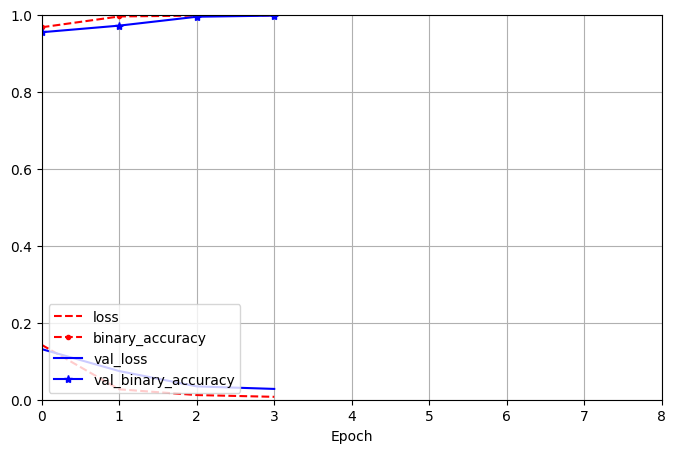

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(model_cnn.history).plot(
    figsize=(8, 5), xlim=[0, 8], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
#save_fig("keras_learning_curves_plot")  # extra code
plt.show()


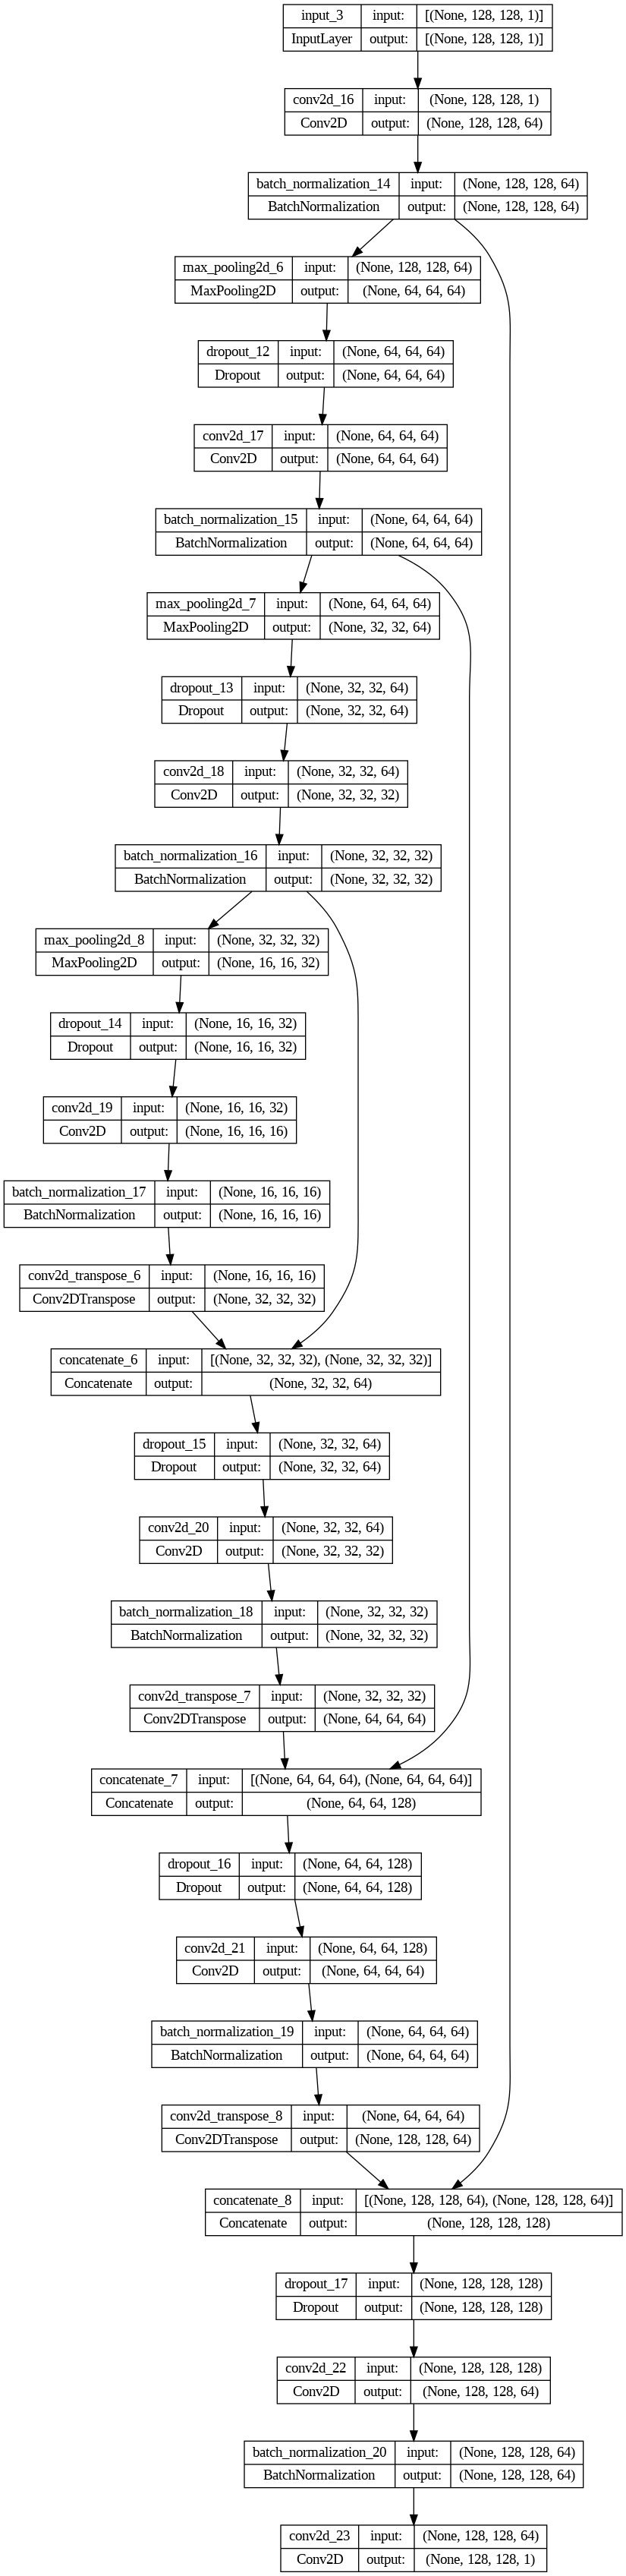

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(unet_model, to_file='unet_model.png', show_shapes=True, show_layer_names=True)

In [20]:
def reconstruct_image_from_patches(patches, original_shape, patch_size, overlap_factor=2):
    height, width = original_shape
    reconstructed_image = np.zeros(original_shape)
    patch_count = np.zeros(original_shape)
    stride = patch_size // overlap_factor
    patch_idx = 0

    for i in range(0, height - patch_size + 1, stride):
        for j in range(0, width - patch_size + 1, stride):
            reconstructed_image[i:i+patch_size, j:j+patch_size] += patches[patch_idx]
            patch_count[i:i+patch_size, j:j+patch_size] += 1
            patch_idx += 1

    reconstructed_image /= patch_count
    return reconstructed_image

In [21]:

dnbr_images_expanded = dnbr_images[..., np.newaxis]
predictions = unet_model.predict(dnbr_images_expanded)

#Reconstruct the image from the patches
predictions = predictions[..., 0]
reconstructed_image = reconstruct_image_from_patches(predictions, dnbr_image.shape, patch_size, overlap_factor=2)


102/102 [==============================] - 4s 32ms/step


<ipython-input-20-699bb1b7c609>:14: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_image /= patch_count


In [22]:
from PIL import Image

def save_image_as_jpeg(image_array, output_path,threshold=0.5):
    #image_normalized = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array)) * 255
    #image_uint8 = Image.fromarray(image_normalized.astype(np.uint8))
    #image_uint8.save(output_path)
    binary_image_array = (image_array > threshold).astype(np.uint8) * 255
    image_uint8 = Image.fromarray(binary_image_array)
    image_uint8.save(output_path)

output_tif_path = 'reconstructed_image_test.tif'
output_jpeg_path = 'testUNET_3.jpeg'

#save_image_as_tif(reconstructed_image, output_tif_path, f'S1/BOX/S1_dNBR_{selected_images[0]}_box.tif')
save_image_as_jpeg(reconstructed_image, output_jpeg_path)

In [26]:
# Read and preprocess the new image
fire_name = 'GrizzlyCreek'
#new_image_path = f'S1/BOX/S1_dNBR_{fire_name}_box.tif'
new_image_path = f'S1/BOX/S1_dNBR_{fire_name}_box.tif'
#new_image_path = f'S2/S2_dNBR_{fire_name}.tif'

new_image = read_geotiff(new_image_path)
preprocessed_new_image = preprocess_image(new_image)


new_image_patches = split_image_into_patches(preprocessed_new_image, patch_size, overlap_factor=2)


new_image_patches_expanded = new_image_patches[..., np.newaxis]
new_image_predictions = unet_model.predict(new_image_patches_expanded)
new_image_predictions = new_image_predictions[..., 0]


reconstructed_new_image = reconstruct_image_from_patches(new_image_predictions, new_image.shape, patch_size, overlap_factor=2)


output_tif_path = 'reconstructed_new_image_test2_GC.tif'
output_jpeg_path = f'S1_128_test_{fire_name}_UNET.jpeg'

#save_image_as_tif(reconstructed_new_image, output_tif_path, new_image_path)
save_image_as_jpeg(reconstructed_new_image, output_jpeg_path)

125/125 [==============================] - 4s 35ms/step


<ipython-input-20-699bb1b7c609>:14: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_image /= patch_count


In [29]:
import pandas as pd
import cv2
from sklearn.metrics import precision_recall_fscore_support

def evaluate_image(true_image, predicted_image):
    true_image_flattened = true_image.flatten().astype(np.float32)
    predicted_image_flattened = (predicted_image.flatten() > 0.5).astype(np.float32)

    loss = BinaryCrossentropy()(true_image_flattened, predicted_image_flattened).numpy()
    accuracy = np.mean((true_image_flattened == predicted_image_flattened).astype(int))
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_image_flattened, predicted_image_flattened, average='binary')

    return loss, accuracy, precision, recall, f1_score


# Evaluate both images
fire_name_eval1 = "CherryCanyon"
fire_name_eval2 = "GrizzlyCreek"

dnbr_image1 = read_geotiff(f'S1/BOX/S1_dNBR_{fire_name_eval1}_box.tif')
dnbr_image2 = read_geotiff(f'S1/BOX/S1_dNBR_{fire_name_eval2}_box.tif')

ground_truth_image1 = (dnbr_image1 > threshold).astype(np.uint8)
ground_truth_image2 = (dnbr_image2 > threshold).astype(np.uint8)

predicted_image1 = cv2.imread(f'CNN_predictions/S1_repatched/S1_128_test_{fire_name_eval1}_UNET.jpeg', cv2.IMREAD_GRAYSCALE)
predicted_image2 = cv2.imread(f'CNN_predictions/S1_repatched/S1_128_2train_{fire_name_eval2}_test.jpeg', cv2.IMREAD_GRAYSCALE)

loss1, accuracy1, precision1, recall1, f1_score1 = evaluate_image(ground_truth_image1, predicted_image1)
loss2, accuracy2, precision2, recall2, f1_score2 = evaluate_image(ground_truth_image2, predicted_image2)

results_table = pd.DataFrame(
    {"Image": [fire_name_eval1, fire_name_eval2],
     "Loss": [loss1, loss2],
     "Accuracy": [accuracy1, accuracy2],
     "Precision": [precision1, precision2],
     "Recall": [recall1, recall2],
     "F1 Score": [f1_score1, f1_score2]}
)


print(results_table)

          Image      Loss  Accuracy  Precision    Recall  F1 Score
0  CherryCanyon  1.858866  0.879482   0.998569  0.877867  0.934336
1  GrizzlyCreek  1.629695  0.894333   0.996982  0.884082  0.937144


In [30]:
def majority_class_accuracy(true_image):
    unique_elements, counts = np.unique(true_image, return_counts=True)
    majority_class_count = np.max(counts)
    return majority_class_count / np.sum(counts)

majority_class_accuracy1 = majority_class_accuracy(ground_truth_image1)
majority_class_accuracy2 = majority_class_accuracy(ground_truth_image2)

results_table["Majority Class Accuracy"] = [majority_class_accuracy1, majority_class_accuracy2]

print(results_table)


          Image      Loss  Accuracy  Precision    Recall  F1 Score  \
0  CherryCanyon  1.858866  0.879482   0.998569  0.877867  0.934336   
1  GrizzlyCreek  1.629695  0.894333   0.996982  0.884082  0.937144   

   Majority Class Accuracy  
0                 0.976714  
1                 0.891001  


Resampling
other: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/smart_resize


In [ ]:
#!pip install osgeo


In [ ]:
import os
from osgeo import gdal

google_drive_path = "/content/drive/MyDrive/Cleaned_Fire_images_TIFF"
os.chdir(google_drive_path)

def resize_image_using_gdalwarp(input_image_path, output_image_path, target_resolution):

    print(f"Processing input image: {input_image_path}")

    input_image = gdal.Open(input_image_path)
    input_geotransform = input_image.GetGeoTransform()

    input_width = input_image.RasterXSize
    input_height = input_image.RasterYSize

    output_width = int((input_width * input_geotransform[1]) / target_resolution[0])
    output_height = int((input_height * abs(input_geotransform[5])) / target_resolution[1])

    resampling_method = gdal.GRA_Bilinear

    warp_options = gdal.WarpOptions(xRes=target_resolution[0], yRes=target_resolution[1], width=output_width, height=output_height, resampleAlg=resampling_method)
    output_image = gdal.Warp(output_image_path, input_image_path, options=warp_options)

    input_image = None
    print(f"Created output image: {output_image_path}")
    return output_image

# Usage example
fire = 'PineGulch'
sentinel2_image_path = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/S2_dNBR_{fire}.tif"
resized_sentinel2_image_path = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/resized_S2_{fire}.tif" # cannot get these to save in google drive....
target_resolution = (10, 10)  # Replace with Sentinel-1 resolution

resize_image_using_gdalwarp(sentinel2_image_path, resized_sentinel2_image_path, target_resolution)
resized_sentinel2_image_path = f"/content/resized_S2_{fire}.tif"


Processing input image: /content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/S2_dNBR_PineGulch.tif
Created output image: /content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/resized_S2_PineGulch.tif


In [ ]:
import tensorflow as tf
from PIL import Image
from google.colab import drive


fire = 'PineGulch'
sentinel2_image_path = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/S2_dNBR_{fire}.tif"
resized_sentinel2_image_path = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/resized_S2_{fire}.tif"

sentinel_2 = imread(sentinel2_image_path)


NameError: ignored

In [36]:

import os
from osgeo import gdal

def resample_image(input_file, output_file, target_resolution=10, resampling_method="bilinear"):
    src_ds = gdal.Open(input_file, gdal.GA_ReadOnly)

    #geotransform and projection
    src_geotransform = src_ds.GetGeoTransform()
    src_projection = src_ds.GetProjection()

    #new geotransform
    new_geotransform = list(src_geotransform)
    new_geotransform[1] = target_resolution
    new_geotransform[5] = -target_resolution

    #new dimensions
    x_size = int((src_ds.RasterXSize * src_geotransform[1]) / target_resolution)
    y_size = int((src_ds.RasterYSize * -src_geotransform[5]) / target_resolution)

    #output dataset
    dst_ds = gdal.GetDriverByName("GTiff").Create(output_file, x_size, y_size, src_ds.RasterCount, src_ds.GetRasterBand(1).DataType)
    if dst_ds is None:
        raise Exception(f"Could not create output file: {output_file}")

    dst_ds.SetGeoTransform(new_geotransform)
    dst_ds.SetProjection(src_projection)

    #resampling
    gdal.ReprojectImage(src_ds, dst_ds, src_projection, src_projection, gdal.GRA_Bilinear)

    # Close
    src_ds = None
    dst_ds = None



In [44]:
#output_directory = os.path.dirname(resized_sentinel2_image_path)
#if not os.path.exists(output_directory):
#    os.makedirs(output_directory)


fire = 'PineGulch'
sentinel2_image_path = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/S2_dNBR_PineGulch.tif"
#resized_sentinel2_image_path = "/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/"

#resample_image(sentinel2_image_path, resized_sentinel2_image_path)

import tempfile
import os

# Create a temporary file
temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".tif")

# Resample and save the image to the temporary file
resample_image(sentinel2_image_path, temp_file.name)

Exception: ignored

In [46]:
#pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 32.2 MB/s eta 0:00:00


In [49]:
import rasterio
from rasterio.enums import Resampling

def resample_image(input_file, output_file, upscale_factor=2):
    with rasterio.open(input_file) as dataset:
        # resample data to target shape
        data = dataset.read(
            out_shape=(
                dataset.count,
                int(dataset.height * upscale_factor),
                int(dataset.width * upscale_factor)
            ),
            resampling=Resampling.bilinear
        )

        # scale image transform
        transform = dataset.transform * dataset.transform.scale(
            (dataset.width / data.shape[-1]),
            (dataset.height / data.shape[-2])
        )
        
        # Update metadata
        kwargs = dataset.meta.copy()
        kwargs.update({
            'height': data.shape[1],
            'width': data.shape[2],
            'transform': transform
        })

        # Write the resampled data to output file
        with rasterio.open(output_file, 'w', **kwargs) as dst:
            dst.write(data)

In [59]:
fire = 'CherryCanyon'
sentinel2_image_path = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/S2_dNBR_{fire}.tif"
resized_sentinel2_image_path = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/Resized_S2/resized_S2_dNBR_{fire}.tif"

input_file = sentinel2_image_path
output_file = resized_sentinel2_image_path 
resample_image(input_file, output_file)

In [60]:
import rasterio

def print_image_info(file_path):
    with rasterio.open(file_path) as dataset:
        print(f"Image: {file_path}")
        print(f"Width: {dataset.width}")
        print(f"Height: {dataset.height}")
        print(f"Resolution: {dataset.res}\n")


input_file = sentinel2_image_path
output_file = resized_sentinel2_image_path
in2 = f"/content/drive/MyDrive/Cleaned_Fire_images_TIFF/S1/BOX/S1_dNBR_{fire}_box.tif"


print_image_info(input_file)
print_image_info(output_file)
print_image_info(in2)

Image: /content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/S2_dNBR_CherryCanyon.tif
Width: 552
Height: 626
Resolution: (0.0001796630568239043, 0.0001796630568239043)

Image: /content/drive/MyDrive/Cleaned_Fire_images_TIFF/S2/Resized_S2/resized_S2_dNBR_CherryCanyon.tif
Width: 1104
Height: 1252
Resolution: (8.983152841195215e-05, 8.983152841195215e-05)

Image: /content/drive/MyDrive/Cleaned_Fire_images_TIFF/S1/BOX/S1_dNBR_CherryCanyon_box.tif
Width: 2142
Height: 2089
Resolution: (8.983152841195215e-05, 8.983152841195215e-05)



In [ ]:
def write_geotiff(output_file, data, input_dataset):
    driver = gdal.GetDriverByName('GTiff')
    out_rows, out_columns = data.shape
    out_bands = 1

    out_data = driver.Create(output_file, out_columns, out_rows, out_bands, gdal.GDT_Byte)
    out_data.SetGeoTransform(input_dataset.GetGeoTransform())
    out_data.SetProjection(input_dataset.GetProjection())

    out_band = out_data.GetRasterBand(1)
    out_band.WriteArray(data)
    out_band.SetNoDataValue(0)
    out_band.FlushCache()

# Open the input GeoTIFF dataset
input_dataset = gdal.Open(input_tif, gdal.GA_ReadOnly)

# Save the output as a GeoTIFF
write_geotiff('output_classification.tif', output_data, input_dataset)

Stack the 2D images (Landsat composite and NLCD impervious surface) to create a single image from which samples can be taken.  Convert the image into an array image in which each pixel stores 256x256 patches of pixels for each band.  This is a key step that bears emphasis: to export training patches, convert a multi-band image to [an array image](https://developers.google.com/earth-engine/arrays_array_images#array-images) using [`neighborhoodToArray()`](https://developers.google.com/earth-engine/api_docs#eeimageneighborhoodtoarray), then sample the image at points.

In [ ]:

featureStack = ee.Image.cat([
  dNBR_S2,
  classified_S2
]).float()

list_ = ee.List.repeat(1, KERNEL_SIZE)
lists = ee.List.repeat(list_, KERNEL_SIZE)
kernel = ee.Kernel.fixed(KERNEL_SIZE, KERNEL_SIZE, lists)

arrays = featureStack.neighborhoodToArray(kernel)


Use some pre-made geometries to sample the stack in strategic locations. Specifically, these are hand-made polygons in which to take the 256x256 samples. Display the sampling polygons on a map, red for training polygons, blue for evaluation. Shows which fires are being used for traiing and which ones are test.


In [ ]:
#trainingPolys = ee.FeatureCollection('projects/google/DemoTrainingGeometries')
#evalPolys = ee.FeatureCollection('projects/google/DemoEvalGeometries')
trainingPolys = geometry
evalPolys = geometry

polyImage = ee.Image(0).byte().paint(trainingPolys, 1).paint(evalPolys, 2)
polyImage = polyImage.updateMask(polyImage)

mapid = polyImage.getMapId({'min': 1, 'max': 2, 'palette': ['red', 'blue']})
map = folium.Map(location=[39.40, -108.5], zoom_start=8)
folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='training polygons',
  ).add_to(map)
map.add_child(folium.LayerControl())
map

# Sampling

The mapped data look reasonable so take a sample from each polygon and merge the results into a single export.  The key step is sampling the array image at points, to get all the pixels in a 256x256 neighborhood at each point.  It's worth noting that to build the training and testing data for the FCNN, you export a single TFRecord file that contains patches of pixel values in each record.  You do NOT need to export each training/testing patch to a different image.  Since each record potentially contains a lot of data (especially with big patches or many input bands), some manual sharding of the computation is necessary to avoid the `computed value too large` error.  Specifically, the following code takes multiple (smaller) samples within each geometry, merging the results to get a single export.